In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from slingpy.data_access.data_sources.hdf5_tools import HDF5Tools
from slingpy.data_access.data_sources.hdf5_data_source import HDF5DataSource

/dfs/user/yhr/causal/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
filename = '/dfs/user/yhr/genedisco/genedisco/genedisco_cache_ifng/schmidt_2021_ifng.h5'

In [14]:
test = '/dfs/user/yhr/AI_RA/research_assistant/datasets/ground_truth_IL2.csv'
scores = pd.read_csv(test)['Score'].values

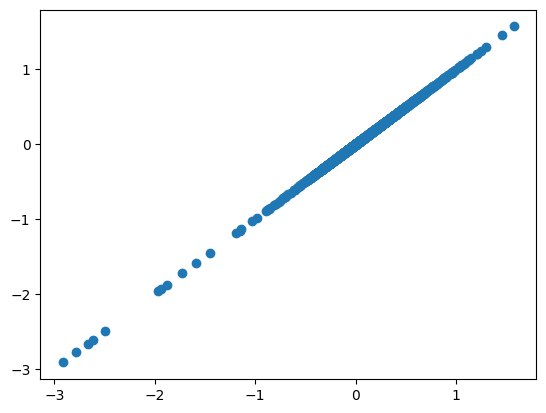

In [16]:
plt.scatter(scores, scores)

In [3]:
import h5py

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  #

Keys: <KeysViewHDF5 ['colnames', 'covariates', 'rownames']>
<class 'h5py._hl.dataset.Dataset'>


In [ ]:
screen_name = 'crispra_GD2_D22'
h5_file = os.path.join(save_directory, f"steinhart_2024_{screen_name}.h5")
if not os.path.exists(h5_file):
    df = pd.read_csv(f'/dfs/user/yhr/AI_RA/research_assistant/datasets/ground_truth_Steinhart_{screen_name}.csv')
    df = df.rename(columns={'0':'Gene_name', '1':'Score'})

    df = df.set_index('Gene_name')
    
    gene_names = df.index.values.tolist()
    name_converter = HGNCNames(save_directory)
    gene_names = name_converter.update_outdated_gene_names(gene_names)
    df.index = gene_names

    # Merge duplicate indices by averaging
    df = df.groupby(df.index).mean()
    gene_names, data = df.index.values.tolist(), df[['Score']].values.astype(np.float32)


    HDF5Tools.save_h5_file(h5_file,
                           data,
                           f"steinhart_2024_{screen_name}.h5",
                           column_names=["Score"],
                           row_names=gene_names)
data_source = HDF5DataSource(h5_file, duplicate_merge_strategy=sp.MeanMergeStrategy())

In [4]:
with h5py.File(filename, 'r') as f:
    covariates = f['covariates'][:]
    print(covariates)

[[ 0.8664957 ]
 [-0.19948187]
 [-0.66753256]
 ...
 [ 0.12752467]
 [ 0.11362068]
 [ 1.5334302 ]]


In [4]:
noise = np.random.normal(mean, std_dev, len(vals))

noisy_data = vals + noise

[[ 0.8664957 ]
 [-0.19948187]
 [-0.66753256]
 ...
 [ 0.12752467]
 [ 0.11362068]
 [ 1.5334302 ]]


In [6]:
vals = pd.read_csv('/dfs/scratch0/jianv/bio-logs/noisy-data/ground_truth_')['Score'].values

In [9]:
mean = np.mean(vals)
std_dev = 0.5

noise = np.random.normal(mean, std_dev, len(vals))

noisy_data = vals + noise

Text(0, 0.5, 'truth')

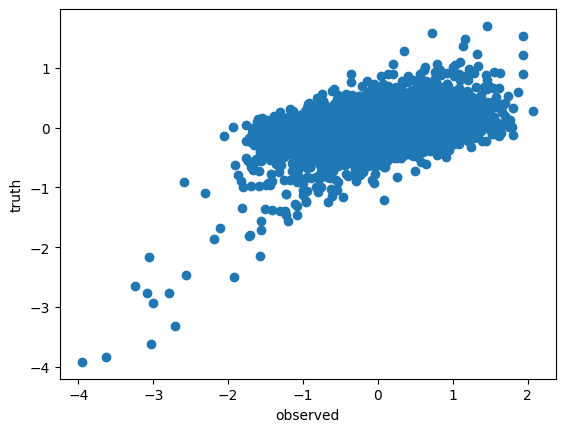

In [10]:
plt.scatter(vals+noise, vals)
plt.xlabel('observed')
plt.ylabel('truth')

(array([4.000e+00, 2.000e+00, 5.000e+00, 2.600e+01, 4.620e+02, 3.458e+03,
        8.046e+03, 5.291e+03, 1.060e+03, 6.400e+01]),
 array([-4.1795576 , -3.55395958, -2.92836156, -2.30276354, -1.67716552,
        -1.0515675 , -0.42596948,  0.19962854,  0.82522656,  1.45082458,
         2.0764226 ]),
 <BarContainer object of 10 artists>)

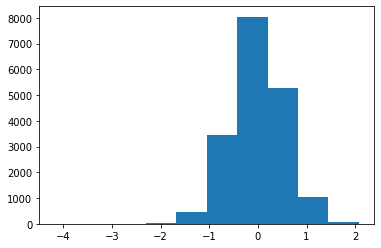

In [16]:
plt.hist(vals+noise)

In [ ]:
with h5py.File(filename, 'r') as f:
    covariates = f['covariates'][:]
    print(covariates)

In [ ]:
noisy_data

In [ ]:
with h5py.File(filename, 'r+') as f:
    
    # Update the dataset with new values
    f['covariates'][...] = np.expand_dims(noisy_data, 1)